In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv('~/rug/thesis/data/influencer_sample010525.csv')
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
df

,post_uid,channel_uid,publishedDate,metrics,potentialReach,source,comments,video_views,engagements,video_plays,shares
0,000075b79f9c314c9dbe766d07016ef0,c149b6fafe123318b768e2e1c716abeb,2022-11-14 16:11:50+00:00,"[{""name"":""facebook_comments"",""value"":""0""},{""na...",21706.0,facebook-content,0.0,0.0,9.0,0.0,NaN
1,0000e07739a036fba13616fa4eb6e9e7,da9acec7669f3db79050175948471cde,2020-01-06 15:10:59+00:00,NaN,20225.0,TWITTER_API,NaN,NaN,NaN,NaN,NaN
2,0001eb4819c534a7a5315eac3ef96e2d,96b6431e916f3f629483d6fa06acf335,2024-11-23 03:01:44+00:00,"[{""name"":""tiktok_video_shares"",""value"":""22""},{...",140500.0,tiktok-content,15.0,0.0,1073.0,157200.0,22.0
3,0001f8ab1ee338b98597bbce534a4b1a,570ef814e5983fc8a152009d2be91bef,2019-08-16 16:06:52+00:00,"[{""name"":""facebook_reactions"",""value"":""120""},{...",69481.0,facebook-content,10.0,0.0,130.0,0.0,1.0
4,000279c0e7a23a8abefbbbb49c740eb6,b95a899244573cf38802aa520ef3a82b,2021-08-18 15:00:42+00:00,"[{""name"":""instagram_comments"",""value"":""6""},{""n...",82089.0,instagram-content,6.0,0.0,4838.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
367068,fffe49cf8576322fb23e683d31f7d5ee,6d58b2d72bed32af821510c6aef723ac,2025-02-24 10:18:28+00:00,NaN,11248.0,instagram-stories-social-data,NaN,NaN,NaN,NaN,NaN
367069,fffe71ee0ced38a49a2cead83aefc0c5,26bf145cbe9c3a10a53c619f05aa750f,2023-06-19 20:42:43+00:00,"[{""name"":""instagram_comments"",""value"":""1""},{""n...",251921.0,instagram-content,1.0,NaN,44.0,5628.0,NaN
367070,fffec68d19ca3dcf8c06aa88202d8c31,d0334d17ea133c5aac89e40ce50404d8,2016-04-14 12:12:13+00:00,NaN,29295.0,instagram-content,NaN,NaN,NaN,NaN,NaN
367071,fffee021bda236f6a839c60fe862307a,8ed4ca5c384d3857a7134e0b93acf87b,2022-07-27 14:43:26+00:00,"[{""name"":""youtube_likes"",""value"":""0""},{""name"":...",18.0,youtube-content,0.0,1.0,0.0,0.0,0.0


In [2]:
df_temp= df.query('channel_uid=="51b52b775df43f1ea0abf5db8789446d"')[['publishedDate', 'video_plays']].dropna()
df_temp = df_temp.set_index('publishedDate').sort_index()
y= df_temp['video_plays']
y = y.sort_index()
y_pos = y.reset_index(drop=True)

#y = y.asfreq('D') 
y

publishedDate
2021-09-09 19:23:35+00:00    4187.0
2021-09-16 12:17:06+00:00    3216.0
2021-09-21 12:15:06+00:00    1914.0
2021-09-22 11:24:18+00:00     656.0
2021-09-25 19:34:55+00:00    1619.0
                              ...  
2024-12-27 14:01:46+00:00    2017.0
2025-01-07 13:34:13+00:00    2425.0
2025-01-10 10:32:02+00:00    1828.0
2025-01-31 22:21:19+00:00    1060.0
2025-02-19 14:56:59+00:00    1550.0
Name: video_plays, Length: 249, dtype: float64

<Axes: xlabel='publishedDate'>

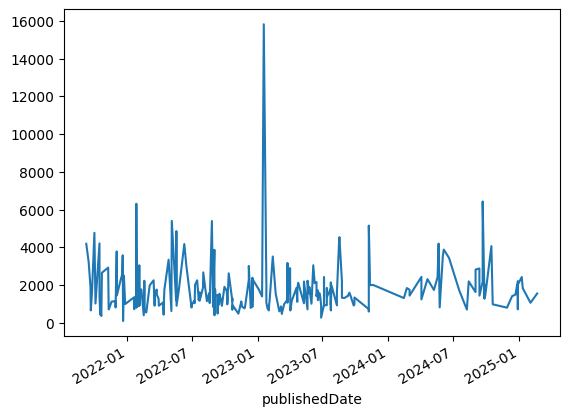

In [3]:
df_temp['video_plays'].plot()

In [4]:
h=6
window=24

In [5]:
from sktime.datasets import load_airline
from sktime.forecasting.model_evaluation import evaluate
from sktime.split import ExpandingWindowSplitter
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import MeanAbsoluteError,MeanSquaredError,MeanAbsolutePercentageError

mae = MeanAbsoluteError()
#mse = MeanSquaredError(square_root=False)
rmse= MeanSquaredError(square_root=True)
mape= MeanAbsolutePercentageError()
scoring=[mae, mape,rmse]
scoring_columns=['test_MeanAbsoluteError','test_MeanAbsolutePercentageError','test_MeanSquaredError']
forecaster = NaiveForecaster(strategy="mean", sp=1)
cv = ExpandingWindowSplitter(initial_window=12, step_length=6, fh=np.arange(1, h+1))
results_mean = evaluate(forecaster=forecaster, y=y_pos, cv=cv,scoring=scoring,error_score='raise',strategy="refit",return_data=False,return_model=False)

res_sum_mean=results_mean[scoring_columns].mean()



In [6]:
results_mean

,test_MeanAbsoluteError,test_MeanAbsolutePercentageError,test_MeanSquaredError,fit_time,pred_time,len_train_window,cutoff
0,1148.888889,1.694118,1219.343368,0.007307,0.005587,12,11
1,873.833333,0.533715,1009.846616,0.006413,0.004036,18,17
2,1125.611111,3.879494,1225.886867,0.009904,0.005809,24,23
3,1448.277778,0.891043,1990.911524,0.008973,0.003991,30,29
4,713.981481,0.567270,802.565028,0.006452,0.003982,36,35
5,764.698413,1.379802,935.305861,0.005614,0.004448,42,41
6,381.500000,0.303483,459.293207,0.006319,0.004049,48,47
7,891.209877,1.039509,1022.033286,0.005911,0.004379,54,53
8,1595.344444,0.761484,2085.541738,0.006120,0.003970,60,59
9,1030.651515,0.625821,1257.962314,0.006032,0.003927,66,65


In [7]:
forecaster = AutoARIMA()

results_arima = evaluate(forecaster=forecaster, y=y_pos, cv=cv,scoring=scoring,error_score='raise',strategy="refit",return_data=True,return_model=False)
res_sum_arima=results_arima[scoring_columns].mean()

/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: '

KeyboardInterrupt: 

In [7]:
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.tbats import  TBATS
from sktime.forecasting.ets import AutoETS
forecaster_tbats = TBATS(sp=1)
#results_tbats = evaluate(
#    forecaster=forecaster_tbats, y=y_pos, cv=cv, scoring=scoring,
#    error_score='raise', strategy="refit", return_data=True, return_model=False
#)
#res_sum_tbats = results_tbats[scoring_columns].mean()



In [8]:
# 3. ETS
forecaster_ets = AutoETS()
results_ets = evaluate(
    forecaster=forecaster_ets, y=y_pos, cv=cv, scoring=scoring,
    error_score='raise', strategy="refit", return_data=True, return_model=False
)
res_sum_ets = results_ets[scoring_columns].mean()



In [9]:
# 4. Theta
forecaster_theta = ThetaForecaster(sp=1)
results_theta = evaluate(
    forecaster=forecaster_theta, y=y_pos, cv=cv, scoring=scoring,
    error_score='raise', strategy="refit", return_data=True, return_model=False
)
res_sum_theta = results_theta[scoring_columns].mean()

/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/esteban/rug/thesis/thesis/venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/esteban/r

In [12]:
from sktime.forecasting.neuralforecast import NeuralForecastLSTM
forecaster_ltsm = NeuralForecastLSTM()
results_ltsm = evaluate(
    forecaster=forecaster_ltsm, y=y_pos, cv=cv, scoring=scoring,
    error_score='raise', strategy="refit", return_data=True, return_model=False
)
res_sum_ltsm = results_ltsm[scoring_columns].mean()

ModuleNotFoundError: NeuralForecastLSTM requires package 'neuralforecast>=1.6.4' to be present in the python environment, but 'neuralforecast>=1.6.4' was not found. 'neuralforecast>=1.6.4' is a dependency of NeuralForecastLSTM and required to construct it. To install the requirement 'neuralforecast>=1.6.4', please run: `pip install neuralforecast>=1.6.4` 

In [10]:
summary_df = pd.DataFrame({
    "AutoARIMA": res_sum_arima,
    "Naive": res_sum_mean,
    "ETS": res_sum_ets,
    "Theta": res_sum_theta,
})

print(summary_df)

                                    AutoARIMA        Naive          ETS  \
test_MeanAbsoluteError             847.756448   847.913887   860.718028   
test_MeanAbsolutePercentageError     0.724173     0.724428     0.719630   
test_MeanSquaredError             1097.700785  1097.946392  1128.256459   

                                        Theta  
test_MeanAbsoluteError             863.441087  
test_MeanAbsolutePercentageError     0.691834  
test_MeanSquaredError             1145.422195  
